#### Author: Omisha Nagaraju

##### Prologue:
This project aims to explore, analyze, classify and predict the success of restaurants based on their text and numeric rating in Sydney using a dataset of over 10,500 records. The data includes information such as restaurant names, locations, ratings, and cuisines.

##### Data Description:
The dataset provided consists of restaurant information from Sydney in 2018. The columns in the dataset include:
- `address`: Restaurant’s address. [text]
- `cost`: Average cost for two people in AUD. [numeric]
- `cuisine`: Cuisines served by the restaurant. [list]
- `lat` and `lng`: Latitude and Longitude of the restaurant. [numeric]
- `url`: URL for the restaurant on Zomato. [text]
- `rating_number`: Numerical rating of the restaurant. [numeric]
- `rating_text`: Textual rating (e.g., Poor, Excellent). [text]
- `subzone`: Suburb where the restaurant is located. [text]
- `title`: Name of the restaurant. [text]
- `type`: Type of restaurant (e.g., Casual Dining). [list]
- `votes`: Number of users who rated the restaurant. [numeric]
- `phone`: Phone mumber of the restaurant. [numeric]
- `groupon`: Whether the restaurant is promoting itself on groupon.com. [boolean]

This dataset will be used for the analysis, model training, and deployment tasks outlined in this assignment.

##### Objective:
To utilize data science techniques such as feature engineering, predictive modeling, and deployment in a real-world scenario by analyzing restaurant success in Sydney. The predictive models will be evaluated for their accuracy in predicting restaurant ratings and classifications.

##### Problem Statement:
The success of restaurants in Sydney can be influenced by various factors such as location, cuisine, cost, and customer ratings. Using the zomato Sydney dataset that contains detailed information about restaurants in Sydney, my goal is to identify the key factors that contribute to a restaurant's success, defined by its customer rating and overall popularity.

IThe below questions will be answered during EDA:
1. How many unique cuisines are served by Sydney restaurants?
2. Which suburbs have the highest concentration of restaurants?
3. Is there a relationship between restaurant ratings and their cost?

In addition, machine learning models are developed to predict a restaurant's success (in terms of ratings) and to classify restaurants into different rating categories. These models will help us understand the features that are most predictive of restaurant success.

## PART-A

### Importing the Data

In [1]:
# Importing required libraries
import pandas as pd

In [2]:
# Path of dataset
zomato_data_path = 'data/zomato_df_final_data.csv'
# Storing data in a dataframe with the first row as column names
zomato_df = pd.read_csv(zomato_data_path, header=0)

## Understanding the Data

In [3]:
# 1. Shape of the dataset
print("Shape of the dataset:", zomato_df.shape)

Shape of the dataset: (10500, 17)


In [4]:
# 2. Displaying the first few rows
print("\nFirst 10 rows of the dataset:")
zomato_df.head(10)


First 10 rows of the dataset:


address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   
5          46 Kensington Street, Chippendale, Sydney  150.0   
6                         3 Bridge Lane, CBD, Sydney  120.0   
7                    490 Crown Street, \tSurry Hills  100.0   
8   The Rocks Centre, 12 Argyle Street, The Rocks...  125.0   
9   Shop 5021, Level 5, Westfield Pitt Street Mal...   70.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   
5            ['Desserts', 'Modern Australian'] -33.885475   
6          ['Cantonese', 'Chinese', 'Yum Cha'] -33.864071   
7                                 ['Japanese'] -33.886736   
8                        ['Japanese', 'Sushi'] -33.858937   
9                        ['Japanese', 'Ramen'] -33.870448   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   
5  https://www.zomato.com/sydney/koi-dessert-bar-...  151.201953   
6          https://www.zomato.com/sydney/mr-wong-cbd  151.208016   
7     https://www.zomato.com/sydney/toko-surry-hills  151.214023   
8  https://www.zomato.com/sydney/saké-restaurant-...  151.208318   
9           https://www.zomato.com/sydney/ippudo-cbd  151.209288   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   
5  02 9212 1230            4.8   Excellent   
6  02 9114 7317            4.5   Excellent   
7  02 9357 6100            4.4   Very Good   
8  02 9259 5656            4.3   Very Good   
9  02 8078 7020            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   
5         Kensington Street, Chippendale                 KOI Dessert Bar   
6                     Establishment, CBD                        Mr. Wong   
7                            Surry Hills                            Toko   
8           The Rocks Centre, The Rocks            Saké Restaurant & Bar   
9        Westfield Pitt Street Mall, CBD                          Ippudo   

                                   type   votes  groupon    color     cost_2  \
0                     ['Casual Dining']  1311.0    False  #e15307   5.243902   
1                              ['Café']  3236.0    False  #9c3203   7.560976   
2                       ['Fine Dining']  1227.0    False  #7f2704  10.650407   
3                ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772   
4                     ['Casual Dining']  2150.0    False  #a83703   5.630081   
5  ['Casual Dining', 'Dessert Parlour']   575.0    False  #892b04  12.967480   
6                     ['Ca

In [5]:
# 3. Summary statistics of numerical columns
print("\nSummary statistics for numerical columns:")
print(zomato_df.describe())


Summary statistics for numerical columns:
               cost           lat           lng  rating_number        votes  \
count  10154.000000  10308.000000  10308.000000    7184.000000  7184.000000   
mean      51.153240    -32.921377    148.067359       3.283672    83.581013   
std       27.799485      8.263449     26.695402       0.454580   175.117966   
min        8.000000    -37.858473   -123.270371       1.800000     4.000000   
25%       30.000000    -33.899094    151.061061       3.000000    12.000000   
50%       45.000000    -33.872741    151.172468       3.300000    32.000000   
75%       60.000000    -33.813451    151.208940       3.600000    87.000000   
max      500.000000     51.500986    152.869052       4.900000  3236.000000   

             cost_2  
count  10154.000000  
mean       5.332974  
std        2.147115  
min        2.000000  
25%        3.699187  
50%        4.857724  
75%        6.016260  
max       40.000000  


In [6]:
# 4. Data types of the columns
print("\nData types of each column:")
print(zomato_df.dtypes)


Data types of each column:
address           object
cost             float64
cuisine           object
lat              float64
link              object
lng              float64
phone             object
rating_number    float64
rating_text       object
subzone           object
title             object
type              object
votes            float64
groupon             bool
color             object
cost_2           float64
cuisine_color     object
dtype: object


In [7]:
# 5. Checking for missing values
print("\nMissing values in the dataset:")
print(zomato_df.isnull().sum())


Missing values in the dataset:
address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64


In [8]:
# 6. Mean and median of the 'rating_number' column
mean_rating = zomato_df['rating_number'].mean()
print(f"Mean Rating: {round(mean_rating,2)}")
rating_count = zomato_df['rating_number'].count()
print(f"Number of Rated Restaurants: {rating_count}")

# 7. Max, Min, and Average of the 'cost' column
max_cost = zomato_df['cost'].max()
min_cost = zomato_df['cost'].min()
avg_cost = zomato_df['cost'].mean()
median_cost = zomato_df['cost'].median()

print(f"Maximum Cost: {max_cost} AUD")
print(f"Minimum Cost: {min_cost} AUD")
print(f"Average Cost: {round(avg_cost,2)} AUD")
print(f"Median Cost: {median_cost} AUD")

Mean Rating: 3.28
Number of Rated Restaurants: 7184
Maximum Cost: 500.0 AUD
Minimum Cost: 8.0 AUD
Average Cost: 51.15 AUD
Median Cost: 45.0 AUD


**Understanding of the Zomato Sydney Dataset**

The dataset contains 10,500 records of Sydney restaurants, detailing key attributes such as name, location, rating, cost, and cuisine. It includes 14 useful columns, with both numerical (e.g., cost, rating_number, votes) and categorical data (e.g., cuisine, rating_text, type). The cost for two people ranges widely, between as cheap as $8 AUD and as costly as $500 AUD, with an average cost of    $51.15 AUD and median of $45 AUD across all restaurants, reflecting both budget and high-end options. The rating_number column is missing values accross both text and numeric for a significant portion of the restaurants, with only 7,184 out of the 10,500 restaurants being rated, with an average numeric rating around 3.28, and textual voting with "Excellent", "Very Good", and "Poor" varies greatly.

Categorical columns like cuisine, rating_text, and type (e.g., 'Casual Dining', 'Fine Dining') provide useful information for analysis. However, some challenges arise due to missing data in key columns like rating_number and votes. These missing values will need to be addressed during data cleaning, either through imputation or exclusion, depending on their impact on the analysis. Additionally, cuisine and type columns, may require further processing since they contain lists rather than individual values.

The mix of numerical and categorical data, along with the spatial attributes (latitude and longitude), allows for both statistical analysis and geospatial visualization using the sydney.geojson file. 


## 1. PLOTS and GRAPHS to SUPPORT the EDA QUESTIONS 

In [9]:
# Importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns

### **Question-1: How many unique cuisines are served by Sydney restaurants?**

Total unique cuisines: 134


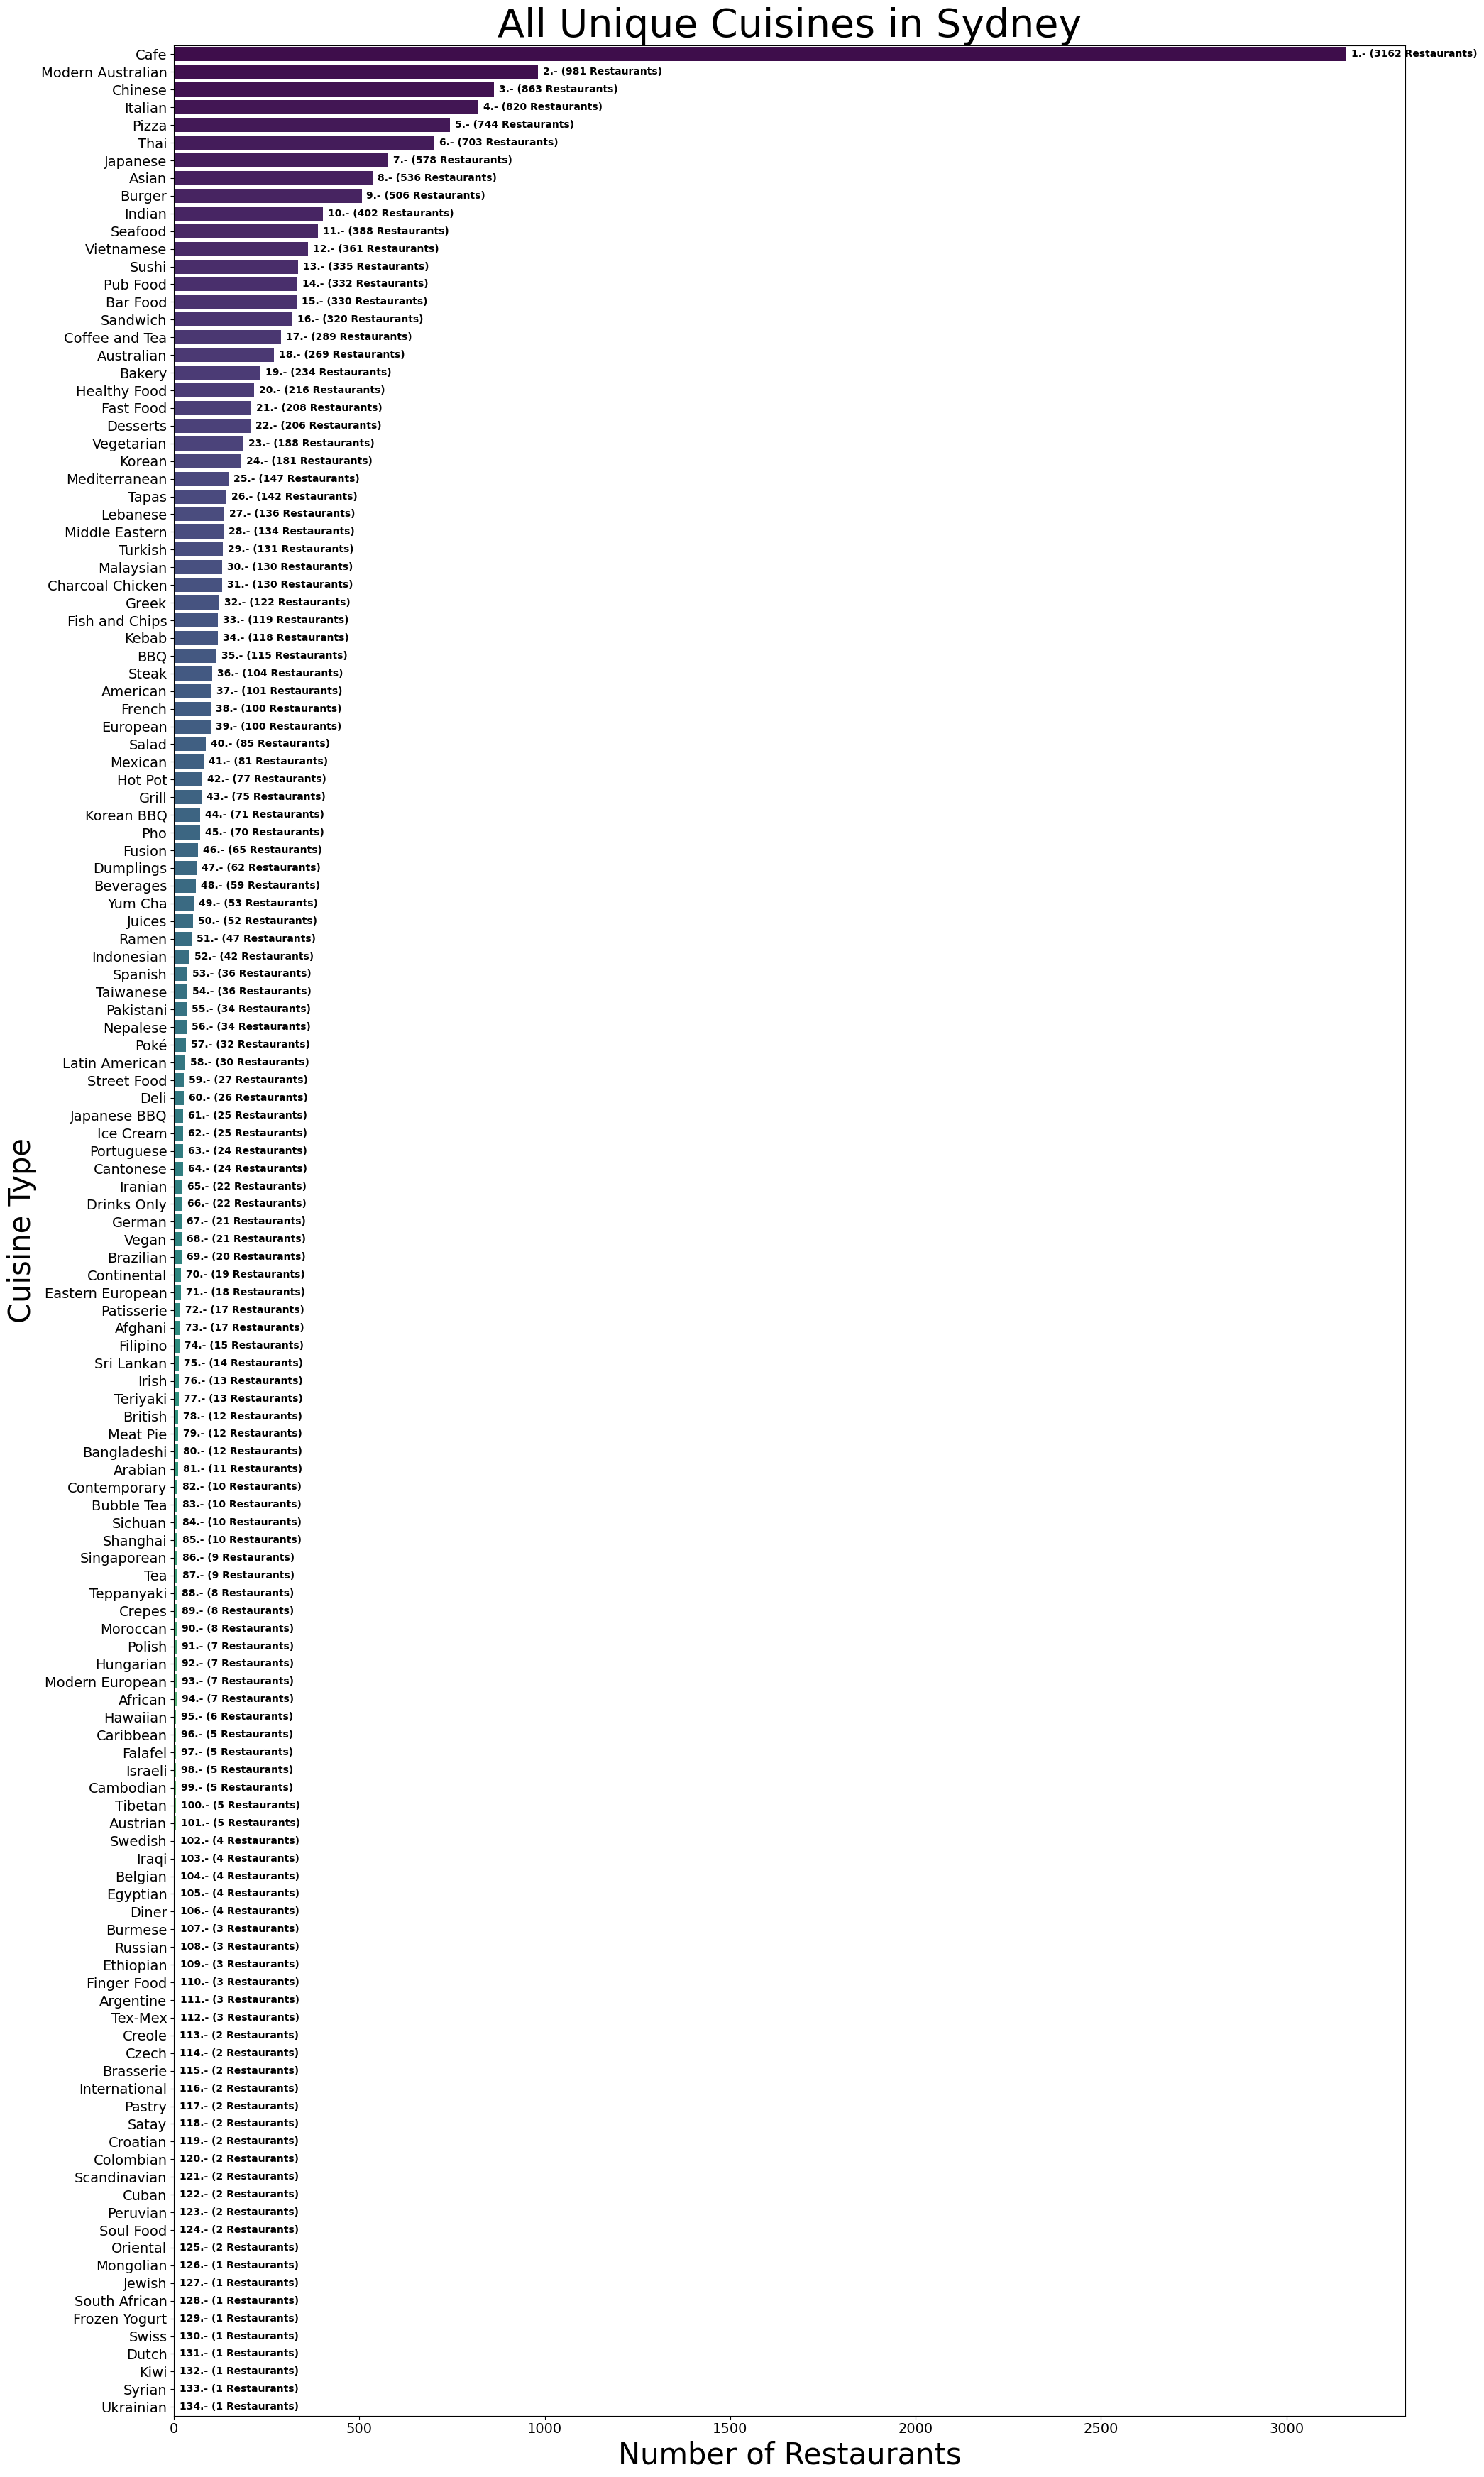

In [10]:
# Finding the number of unique cuisines using sets
zomato_df['cuisine'] = zomato_df['cuisine'].apply(lambda x: eval(x) if isinstance(x, str) else x)
all_cuisines = set([item for cuisine in zomato_df['cuisine'] for item in cuisine])
print(f"Total unique cuisines: {len(all_cuisines)}")


# Plotting the distribution of cuisines
cuisine_counts = pd.Series([item for sublist in zomato_df['cuisine'] for item in sublist]).value_counts()
plt.figure(figsize=(20, 35))
sns.barplot(x=cuisine_counts.values, y=cuisine_counts.index, hue=cuisine_counts.index, palette='viridis', legend=False)
plt.title('All Unique Cuisines in Sydney', fontsize=40)
plt.xlabel('Number of Restaurants', fontsize=30)
plt.ylabel('Cuisine Type', fontsize=30)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.subplots_adjust(top=0.95)
plt.tight_layout()

# Adding numbering on the plot to find number of unique cuisines present
for i, (cuisine, count) in enumerate(cuisine_counts.items()):
    plt.annotate(f"{i+1}.- ({count} Restaurants)", xy=(count, i), xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10, fontweight='bold')

plt.show()

##### The visualisations shown here using the bar chart depicts that there are **134 unique cuisines** in the Sydney restauarant business in the dataset provided. 

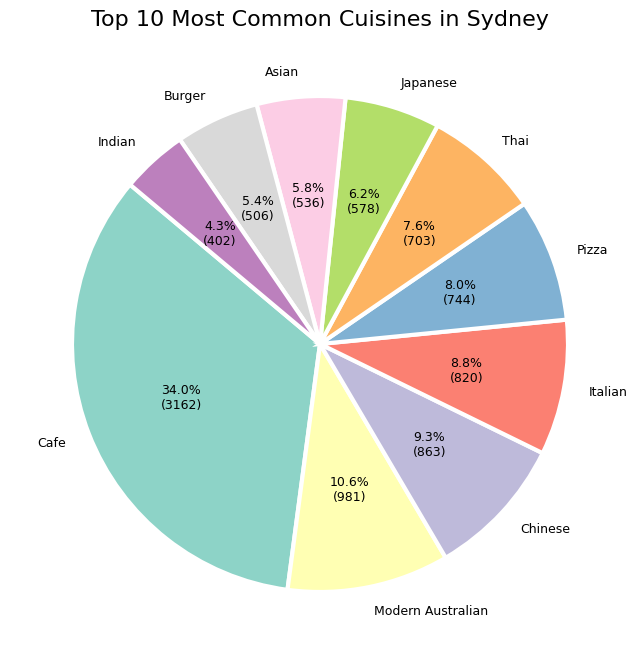

In [11]:
# Checking the Top-10 cuisines in Sydney
cuisines = pd.Series([cuisine for sublist in zomato_df['cuisine'] for cuisine in sublist])
top_10_cuisines = cuisines.value_counts().head(10)  # Get top 10 cuisines for the pie chart

# Plotting pie-chart
plt.figure(figsize=(8, 8))
palette = plt.cm.Set3(range(len(top_10_cuisines)))
plt.pie(top_10_cuisines, labels=top_10_cuisines.index, autopct=lambda p : '{:.1f}%\n({:.0f})'.format(p, p * top_10_cuisines.sum() / 100), textprops={'fontsize': 9}, wedgeprops={'edgecolor': 'white', 'linewidth': 3.0}, startangle=140, colors=palette)
plt.title('Top 10 Most Common Cuisines in Sydney', fontsize=16)
plt.subplots_adjust(top=0.9)  
plt.show()

This diverse variety of cuisines are serving numberous people, taste and cultures. 

The pie chart shows the top 10 most common cusines among the **134 unique cuisines**, with Café being the most and an absolute majority with 34% of the types of restaurants (3162 in number), followed by Modern Aussie comming with 10.6% (981 restaurants serving the cuisine), and chinese cuisine with 863 restaurants comming third with 9.3%. This chart truly shows the coffee culture of Sydney shown by how popular the cafes are. Because of their multicultural environtment we can also see types of cuisines that includes modern flavourings mixing with traditional ones like Chinese, Indian (402 restaurants at 4.2%) and Modern Aussie cuisine. 

As also seen on the bar chart that shows all the unique cuisines in the city of Sydney, different cuisines from around the world are being served in restaurants, like Iraqui, Syngaporian, Tibetan, Hawaian, Morrocan, and plenty more, though much less common and fewer in number, make Sydney a melty pot of cuisines from around the world.

### **Question-2: Which suburbs (top 3) have the highest number of restaurants?**

In [12]:
# Extracting the main suburb if subareas exist in rows
def extract_suburb(suburb):
    if ',' in suburb:
        return suburb.split(',')[1].strip()
    return suburb.strip()

# Apply the function to the subzone column
zomato_df['subzone'] = zomato_df['subzone'].apply(extract_suburb)

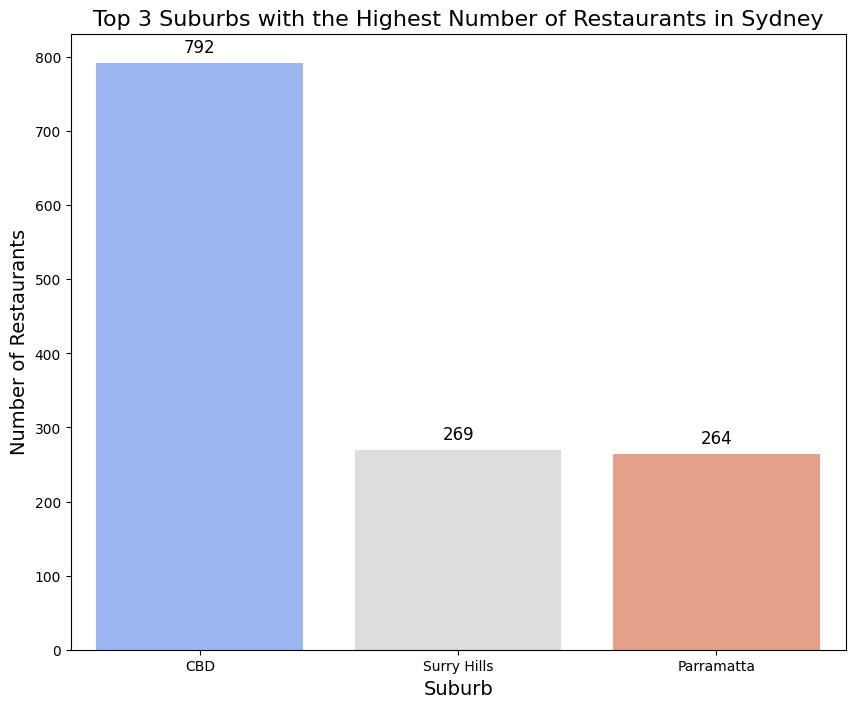

In [13]:
# Counting the number of restaurants per suburb sorted in descending order to choose top-3 suburbs
top_3_suburbs = zomato_df['subzone'].value_counts().head(3)

# Plotting the top 3 suburbs with the highest number of restaurants
plt.figure(figsize=(10, 8))
sns.barplot(x=top_3_suburbs.index, y=top_3_suburbs.values, hue=top_3_suburbs.index, palette='coolwarm', legend=False)
plt.title('Top 3 Suburbs with the Highest Number of Restaurants in Sydney', fontsize=16)
plt.xlabel('Suburb', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.grid(False)

# Adding number of restaurants above the bars
for i, (suburb, count) in enumerate(top_3_suburbs.items()):
    plt.annotate(f"{count}", xy=(i, count), xytext=(0, 5), textcoords='offset points', ha='center', va='bottom', fontsize=12)

plt.show()

##### The bar plot provided above clearly indicates that the Central Business District **(CBD), Surry Hills, and Parramatta** are the top three suburbs with the highest number of restaurants in Sydney.                                                                                   
I found this out by using value_counts() to arrange the number of restaurants per suburb in descending order and then extracting the Top-3 restaurants to plot them.

1. CBD (Central Business District):
Number of Restaurants: 792
The CBD stands out with the highest number of restaurants, significantly surpassing other suburbs. This concentration is common for business districts in major cities where there are several office workers, tourists due to main attractions like Opera House and Harbour Bridge, students and residents driving a thriving restaurant scene.

2. Surry Hills:
Number of Restaurants: 269
Known for its vibrant cultural background, Surry Hills has the second highest number of restaurants with 269 restraunts.

3. Parramatta:
Number of Restaurants: 264
As a significant commercial and suburban center in Western Sydney, Parramatta holds a strong third position with a substantial number of restaurants. 

### **Question-3: “Restaurants with ‘excellent’ ratings are mostly costly while those with ‘Poor’ ratings are rarely expensive”. Do you agree with this statement or not?**

<Figure size 1200x600 with 0 Axes>

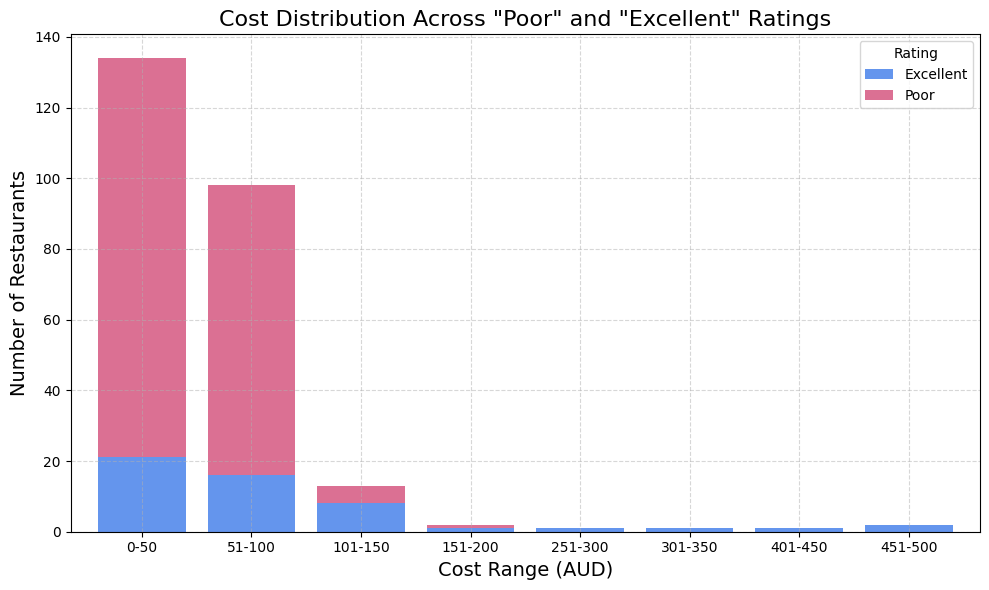

In [14]:
# Creating cost bins
cost_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
zomato_df['cost_bin'] = pd.cut(zomato_df['cost'], bins=cost_bins, labels=['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500'])

# Filtering for 'Poor' and 'Excellent' ratings text only
filtered_data = zomato_df[zomato_df['rating_text'].isin(['Poor', 'Excellent'])]

# Creating a pivot table with cotbins and rating
cost_rating_pivot = pd.crosstab(filtered_data['cost_bin'], filtered_data['rating_text'])

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
cost_rating_pivot.plot(kind='bar', stacked=True, color=['cornflowerblue', 'palevioletred'], figsize=(10, 6), width=0.8)  # Using Tomato for 'Poor', SteelBlue for 'Excellent'
plt.title('Cost Distribution Across "Poor" and "Excellent" Ratings', fontsize=16)
plt.xlabel('Cost Range (AUD)', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Rating')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 800x800 with 0 Axes>

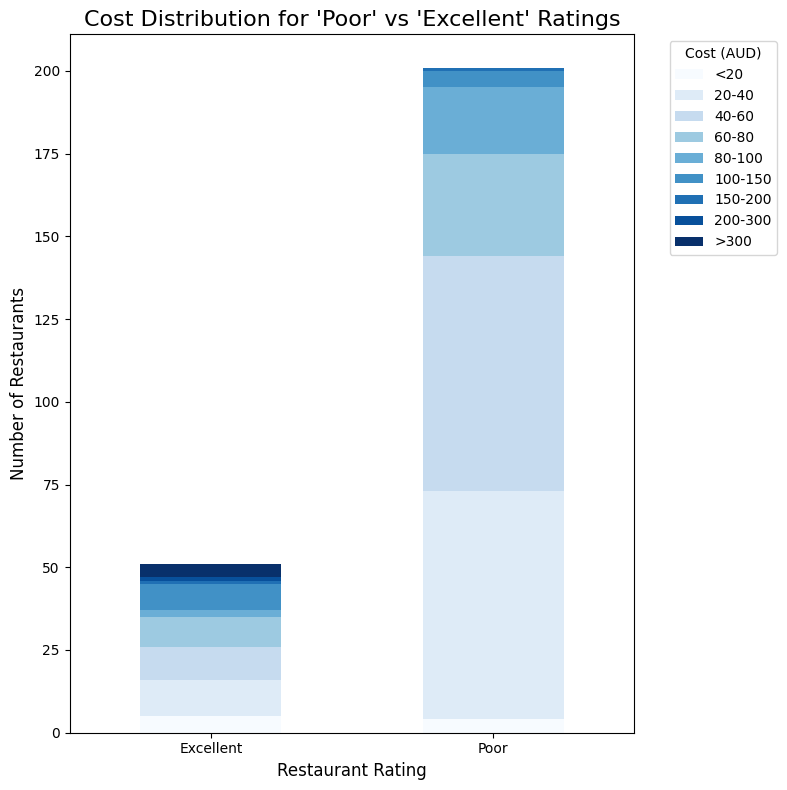

In [15]:
# Defining differnt cost bins
cost_bins = [0, 20, 40, 60, 80, 100, 150, 200, 300, 500]
cost_labels = ['<20', '20-40', '40-60', '60-80', '80-100', '100-150', '150-200', '200-300', '>300']

# Binning the cost values into these ranges
filtered_data = filtered_data.assign(cost_bins=pd.cut(filtered_data['cost'], bins=cost_bins, labels=cost_labels))

# Grouping by rating_text and cost_bins to count occurrences
cost_rating_group_filtered = filtered_data.groupby(['rating_text', 'cost_bins'], observed=True).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(8, 8))
cost_rating_group_filtered.plot(kind='bar', stacked=True, figsize=(8, 8), cmap='Blues')

plt.title("Cost Distribution for 'Poor' vs 'Excellent' Ratings", fontsize=16)
plt.xlabel("Restaurant Rating", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.legend(title='Cost (AUD)', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=10)  
plt.xticks(rotation=0, fontsize=10) 
plt.yticks(fontsize=10) 
plt.grid(False)
plt.tight_layout()
plt.show()


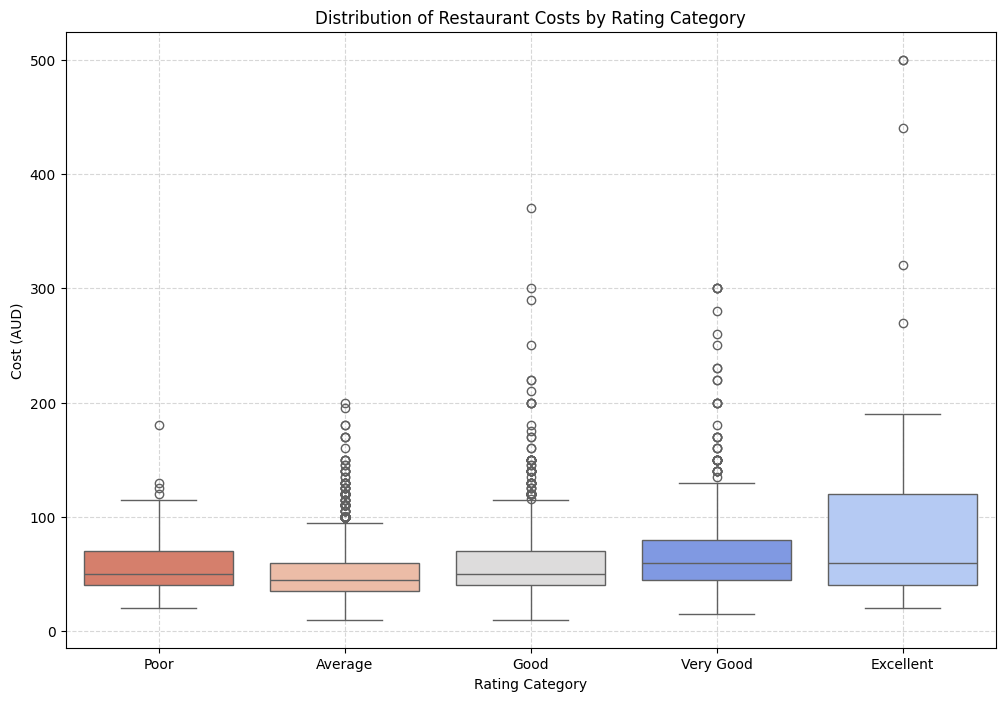

In [16]:
# Cleaning up the rating_text to focus on key categories only and remove any nulls or erroneous data
zomato_df = zomato_df[zomato_df['rating_text'].isin(['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])]

# Creating a box plot of cost across different rating categories and plotting it against cost
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating_text', y='cost', data=zomato_df, order=['Poor', 'Average', 'Good', 'Very Good', 'Excellent'], hue='rating_text', palette='coolwarm', legend=False)
plt.title('Distribution of Restaurant Costs by Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Cost (AUD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

##### **Using the plots made, 'Restaurants with ‘excellent’ ratings are mostly costly while those with ‘poor’ ratings are rarely expensive' is generally true.**
1. Histogram and Bar Plot:
Excellent-rated Restaurants: Mostly located at the lower to middle range of the pricing scale (below $100 AUD) suggesting that affordable pricing is more prevalent in these highly-rated establishments, but it can also be seen that the above $300 price range restaurants are highly rated. 

    Poor-rated Restaurants: Though a smaller minority, they were more prominently found in the low-price bins than excellent-rated places were, especially in the over-$100 AUD price bracket.

2. Box Plot:
Excellent-rated Restaurants: Have a higher median cost (about $150 AUD) with a much larger range of pricing stretching into all the more expensive categories (above $300 AUD). 

Poor-rated Restaurants: Such restaurants have a lower median cost with tight distribution, mainly under $100 AUD, which further validates their relative affordability relative to other establishments.


Restaurants that are rated as ‘Excellent’ tend to have a higher median price, and stretch to higher price points, which might create an impression of being ‘mostly expensive’. Yet they also have a good deal of representation among the lower-priced categories, indicative of a pricing range that can accommodate all budgets.

For restaurants with ‘poor’ ratings, the cost brackets in the higher end are almost completely absent. Although low-cost dining is their main stay, the ‘poor’ category is similar to the other four categories such as average good and very good, showing that lower price restaurants are not essentially just poorly rated.

While excellent-rated restaurants often appear in higher cost brackets, indicating a costly trend, they also provide options across a broad spectrum of prices, including more lower price points. 
On the other hand, poor-rated restaurants typically occur in lower cost ranges but are not confined to them, as they too can reach into mid-range prices but not in the extremely high prices (>$300 AUD).


## 2. FURTHER EXPLORATORY DATA ANALYSIS

Cost Summary Statistics:
count    7081.000000
mean       55.273690
std        29.238947
min        10.000000
25%        35.000000
50%        50.000000
75%        70.000000
max       500.000000
Name: cost, dtype: float64


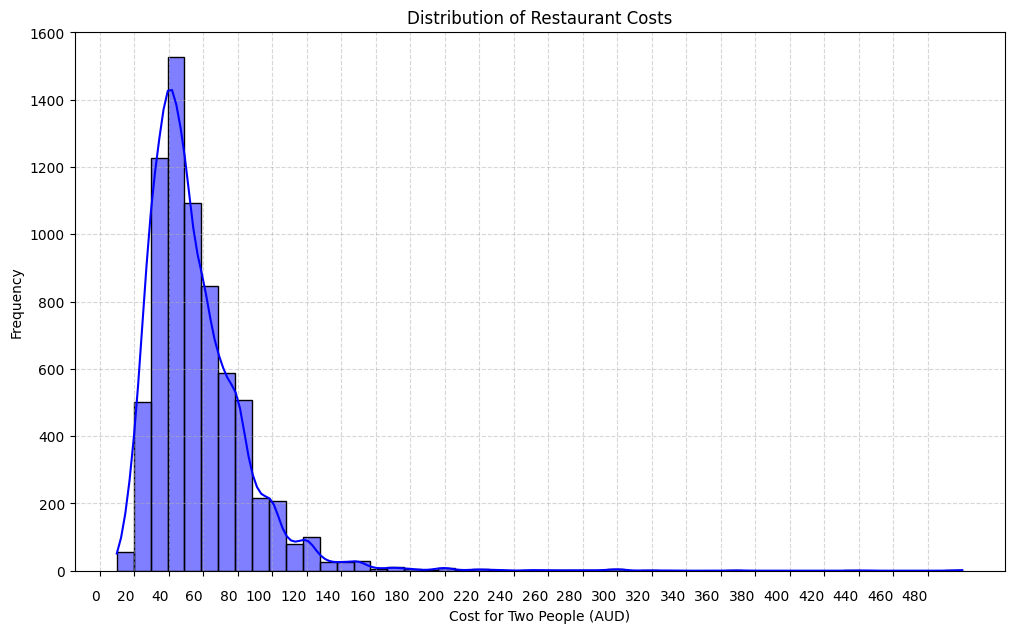

In [17]:
# 1. Analyzing the 'cost' column: Summary statistics and distribution
cost_summary = zomato_df['cost'].describe()
print("Cost Summary Statistics:")
print(cost_summary)

# Plotting the distribution of the 'cost' column
plt.figure(figsize=(12, 7))
sns.histplot(zomato_df['cost'], bins=50, kde=True, color='blue')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost for Two People (AUD)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 500, 20), rotation=0, ha='right')  
plt.gca().xaxis.set_tick_params(pad=10) 
plt.show()


Rating Summary Statistics:
count    7184.000000
mean        3.283672
std         0.454580
min         1.800000
25%         3.000000
50%         3.300000
75%         3.600000
max         4.900000
Name: rating_number, dtype: float64


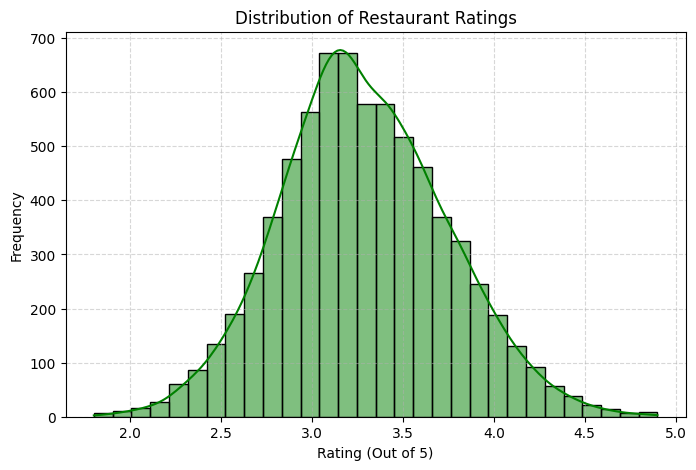

In [18]:
# 2. Analyzing the 'rating_number' column: Summary statistics and distribution
rating_summary = zomato_df['rating_number'].describe()
print("\nRating Summary Statistics:")
print(rating_summary)

# Plotting the distribution of 'rating_number'
plt.figure(figsize=(8, 5))
sns.histplot(zomato_df['rating_number'], bins=30, kde=True, color='green')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating (Out of 5)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

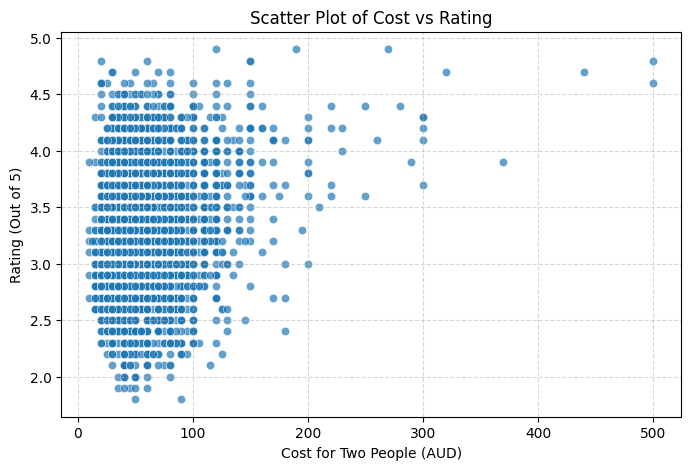

In [19]:
# 3. Correlation between 'cost' and 'rating_number'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='cost', y='rating_number', data=zomato_df, alpha=0.7)
plt.title('Scatter Plot of Cost vs Rating')
plt.xlabel('Cost for Two People (AUD)')
plt.ylabel('Rating (Out of 5)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


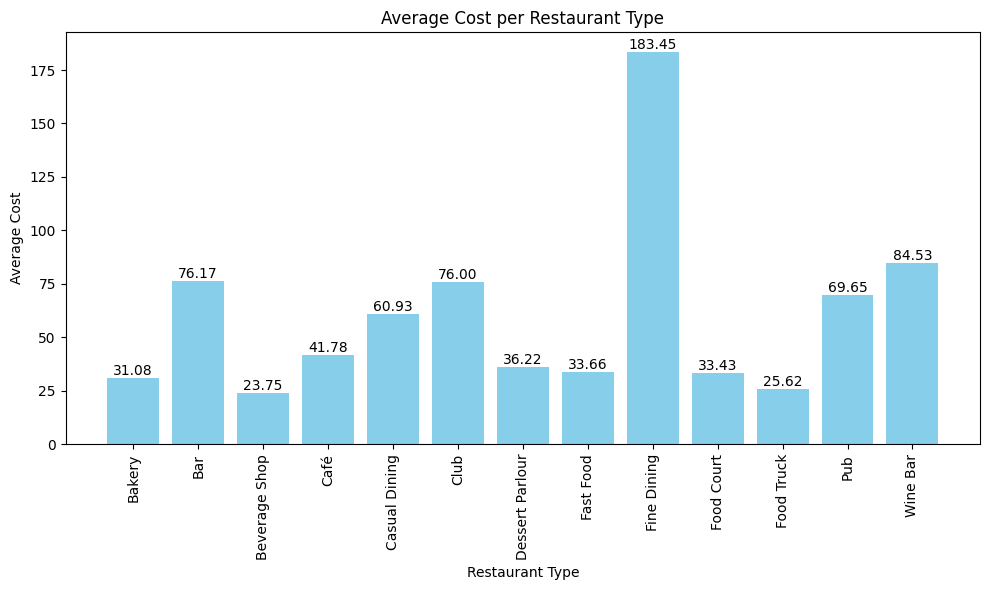

In [20]:
# 4. Analyzing the types of restaurants ('type' column)

# Unpacking the type column and creating a new DataFrame
zomato_df['type'] = zomato_df['type'].apply(lambda x: eval(x) if isinstance(x, str) else x)

# Exploding the type column so that each type gets its own row
zomato_exploded_df = zomato_df.explode('type')

# Grouping by type for cost
avg_cost_per_type = zomato_exploded_df.groupby('type')['cost'].mean().reset_index()

# Plotting type vs average cost as a vertical bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_cost_per_type['type'], avg_cost_per_type['cost'], color='skyblue')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.ylabel('Average Cost')
plt.xlabel('Restaurant Type')
plt.title('Average Cost per Restaurant Type')
plt.tight_layout()  # Adjust layout to avoid clipping

# Adding labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%.2f' % height, ha='center', va='bottom')

plt.show()

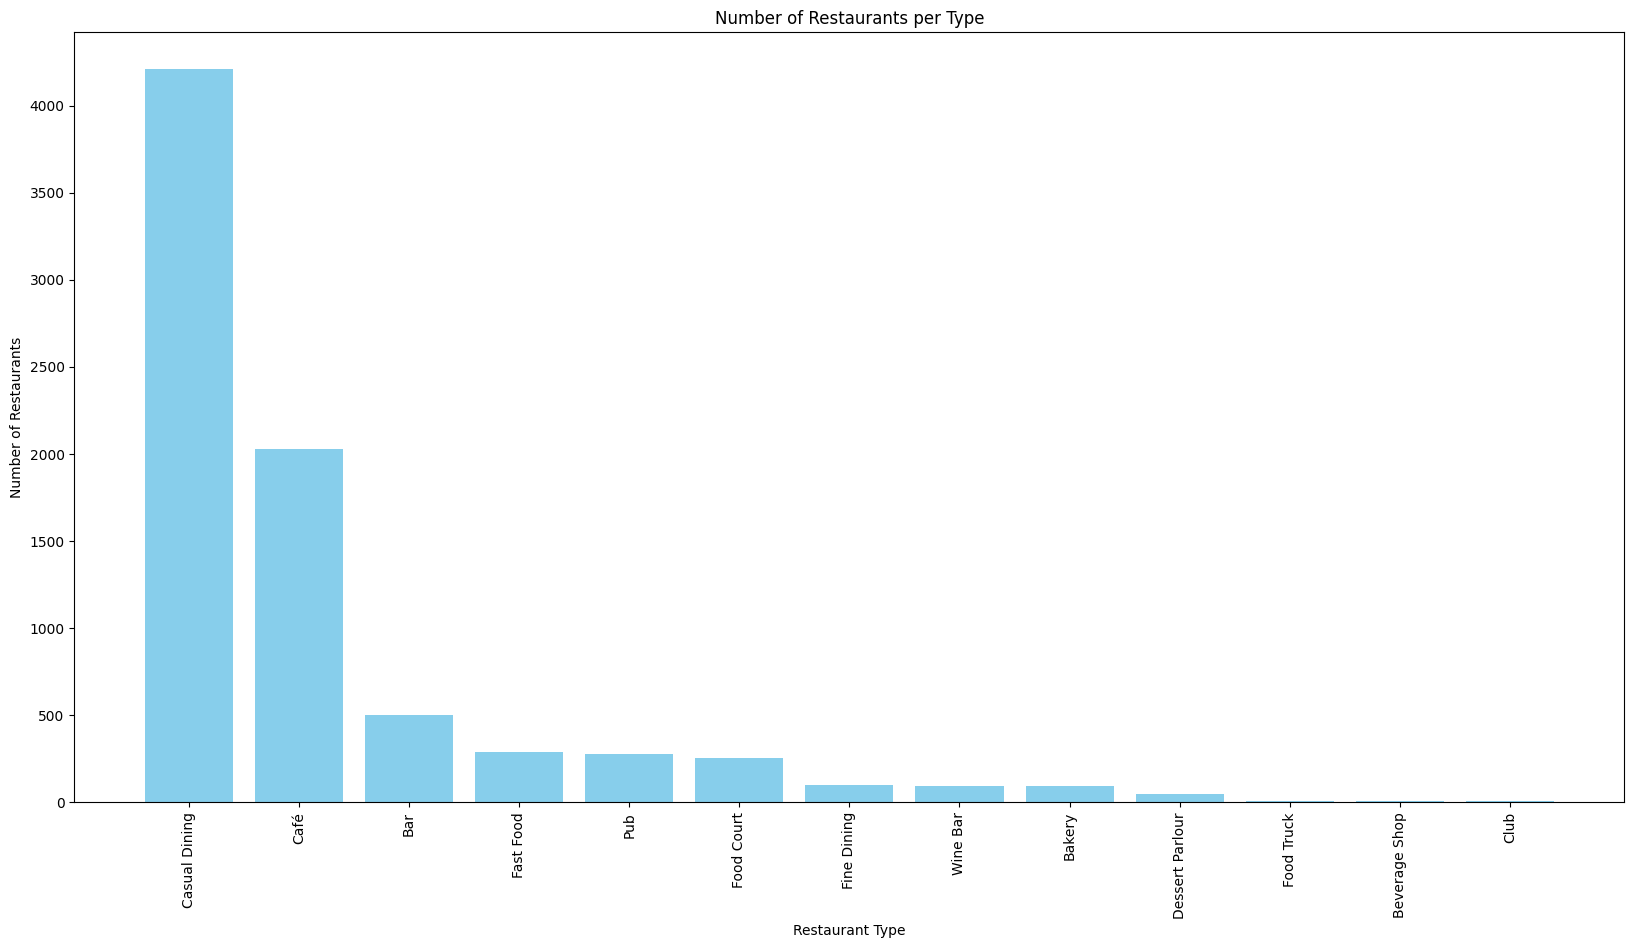

In [21]:
# 5. Plotting 'type' vs 'number of restaurants'

# Count the number of restaurants per type
restaurant_count_per_type = zomato_exploded_df['type'].value_counts().reset_index()
restaurant_count_per_type.columns = ['type', 'num_restaurants']

# Plot 'type' vs 'number of restaurants'
plt.figure(figsize=(20, 10))
plt.bar(restaurant_count_per_type['type'], restaurant_count_per_type['num_restaurants'], color='skyblue')
plt.xlabel('Restaurant Type')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants per Type')
plt.xticks(rotation=90)
plt.show()

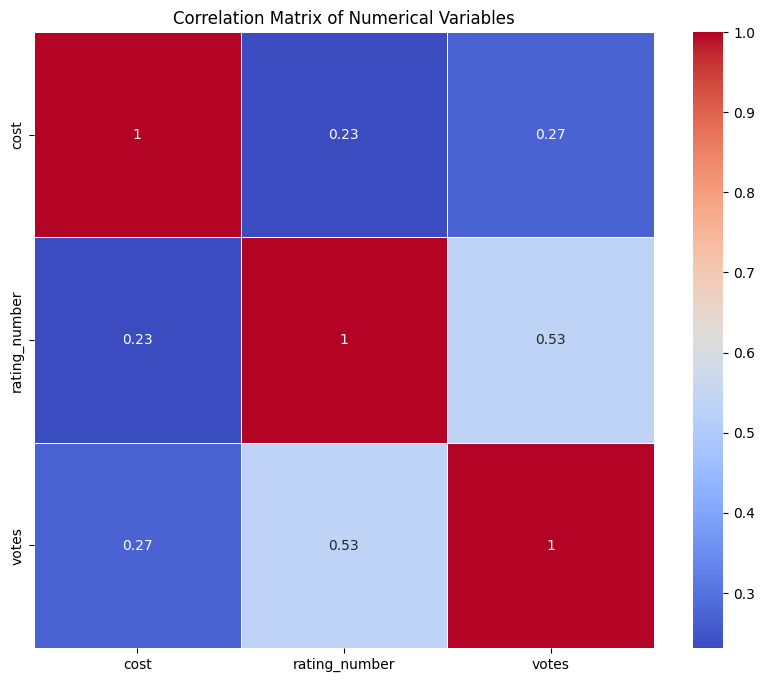

In [22]:
# 6. Correlation matrix to explore relationships between numerical variables

plt.figure(figsize=(10, 8))
corr_matrix = zomato_df[['cost', 'rating_number', 'votes']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

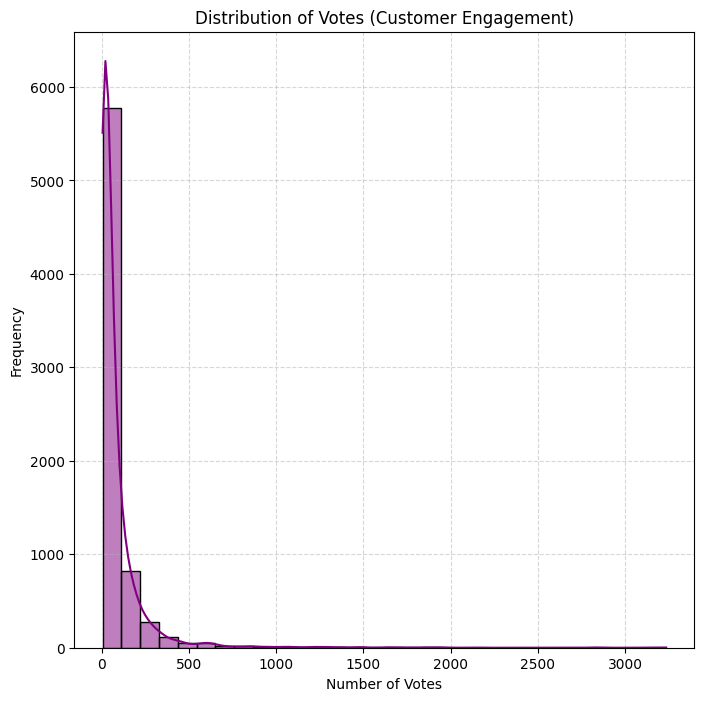

In [23]:
# 7. Distribution of 'votes' to understand customer engagement

plt.figure(figsize=(8, 8))
sns.histplot(zomato_df['votes'], bins=30, kde=True, color='purple')
plt.title('Distribution of Votes (Customer Engagement)')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [24]:
# 8. Which restaurant has the highest cost and which one is rated the highest?

most_expensive_restaurant = zomato_df.loc[zomato_df['cost'].idxmax(), ['title', 'subzone', 'cost']]
print("Most Expensive Restaurant:")
print(most_expensive_restaurant)

most_voted_restaurant = zomato_df.loc[zomato_df['votes'].idxmax(), ['title', 'subzone', 'votes']]
print("\nRestaurant with the Most Votes (Customer Engagement):")
print(most_voted_restaurant)

Most Expensive Restaurant:
title           Quay
subzone    The Rocks
cost           500.0
Name: 10, dtype: object

Restaurant with the Most Votes (Customer Engagement):
title      The Grounds of Alexandria Cafe
subzone                        Alexandria
votes                              3236.0
Name: 1, dtype: object



Subzones with the Highest Customer Engagement (Total Votes):
subzone
CBD                80347.0
Surry Hills        49830.0
Newtown            27342.0
Chinatown          25184.0
Darlinghurst       18387.0
The Rocks          14793.0
Bondi Beach        11888.0
Potts Point        11157.0
Parramatta         11029.0
Darling Harbour    10972.0
Name: votes, dtype: float64


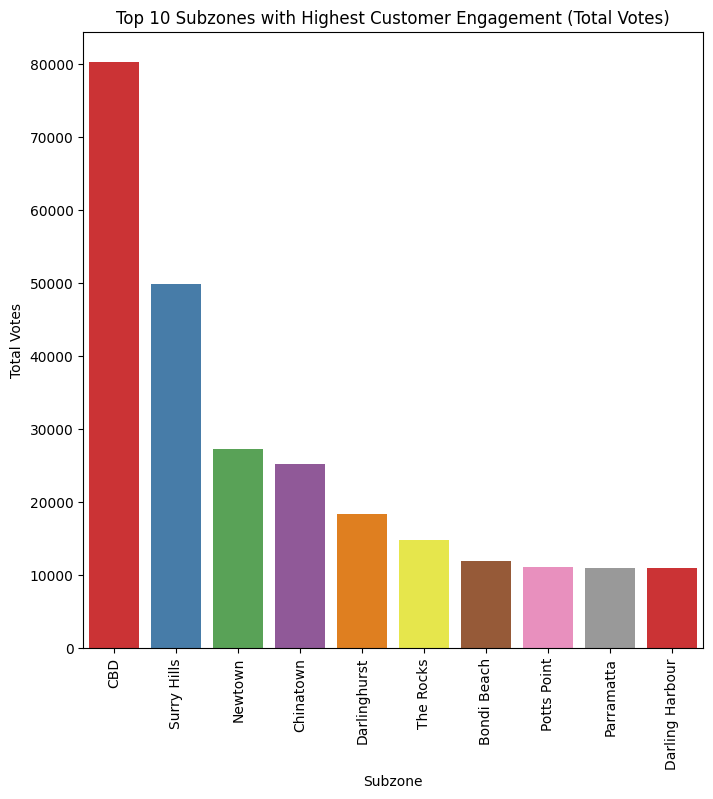

In [25]:
# 9. Which suburb experiences restaurants with highest number of votes?

subzone_total_votes = zomato_df.groupby('subzone')['votes'].sum().sort_values(ascending=False).head(10)
print("\nSubzones with the Highest Customer Engagement (Total Votes):")
print(subzone_total_votes)

# Visualize top 10 subzones by customer engagement (votes)
plt.figure(figsize=(8, 8))
sns.barplot(x=subzone_total_votes.index, y=subzone_total_votes.values, hue=subzone_total_votes.index, palette="Set1", legend=False)
plt.title('Top 10 Subzones with Highest Customer Engagement (Total Votes)')
plt.xlabel('Subzone')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.grid(False)
plt.show()

### Documentaion of insights gathered from Exploratory Data Analysis

**1. Cost Analysis:**
The dataset shows a wide range of restaurant costs. 
The distribution of costs shows that the majority of restaurants fall in the lower-to-mid range of pricing with most restaurants having prices between $40 AUD - $60 AUD, with a long tail of more expensive options.
From the histogram, we can conclude that most restaurants are clustered around affordable price points, with relatively fewer fine dining or expensive options.

**2. Rating Analysis:**
The average rating of restaurants in the dataset is 3.28. The ratings range from 1.80 to 4.90. 
The distribution of ratings shows that most restaurants are rated between 3 and 3.5, with very few restaurants receiving excellent and fewer getting poor ratings.
This indicates that customers generally provide favorable ratings for restaurants in Sydney, with very few establishments rated poorly.

**3. Correlation Between Cost and Rating:**
I analyzed the relationship between the cost of a meal and the restaurant’s rating. The scatter plot suggests that there is no strong correlation between cost and rating. While the higher-end restaurants do have high ratings, there are also affordable restaurants with excellent ratings. This suggests that price is not a sole indicator of restaurant quality; other factors likely contribute to high ratings.

**4. Cost and Restaurant Type:**
The plot of cost for different restaurant types provides insights into how restaurant type influences pricing Fine Dining restaurants have highest average costs (AUD 183) as expected.
Cafés and Casual Dining establishments tend to have lower costs, consistent with expectations for these types of eateries with other type of establishments following a similar low to mid cost trend with Food Trucks and Drink Shops having the lowest price ranges (AUD 23 - AUD 25).

**5. Restaurant Types:**
The dataset categorizes restaurants into various types such as Casual Dining, Fine Dining, and Cafe. The most common restaurant types are:
Casual Dining and Café are the two most frequent types, indicating a preference for relaxed dining experiences in Sydney. Fine Dining is relatively less frequent, suggesting that it occupies a niche in the Sydney restaurant market.
The bar plot of restaurant types confirms that the dining experiences in Sydney is dominated by casual and café-style restaurants followed by bars, fast food and food courts, while higher-end options are available but fewer in number with pubs being the least common type.

**6. Correlation Matrix:**
The correlation matrix of cost, rating_number, and votes shows weak correlations between these numerical variables.
There is a mild positive correlation between rating_number and votes (0.53), indicating that highly-rated restaurants may receive more votes.
The correlation between cost and votes is negligible (0.27), confirming that expensive restaurants are not necessarily more popular.


**7. Customer Engagement (Votes Distribution):**
The distribution of votes highlights that the majority of restaurants have fewer than 500- 1,000 votes, suggesting that customer engagement is concentrated among a smaller number of highly popular restaurants.

**8. Most Expensive Restaurant:**
The most expensive restaurant in the dataset is Quay located in The Rocks, with a cost for two people of $500 AUD. This establishment likely caters to high-end customers in a premium location.

**9. Subzones with the Most Customer Engagement (Total Votes):**
Customer engagement, measured by the number of votes, Surry Hills, CBD, and Newtown lead in terms of total customer votes, indicating that restaurants in these areas are more popular and receive more feedback from customers. These areas likely house restaurants that are not only well-known but also frequently visited, possibly because of their prime location or the quality of dining experiences they offer.



## 3. CUISINE-DENSITY MAP

In [26]:
# Importing required libraries
import geopandas as gpd

# Loading the geojson file
geojson_path = 'data/sydney.geojson'  
sydney_geojson = gpd.read_file(geojson_path)

In [27]:
# Defining a function to render cuisine-density map
def cuisine_density_map(zomato_data, sydney_geodata, selected_cuisine):
   
    # Creating a cuisine-based subset of restaurants 
    restaurant_by_cuisine = zomato_data[zomato_data['cuisine'].apply(lambda c: selected_cuisine in c if isinstance(c, list) else False)]
    
    # Grouping restaurants serving cuisines by suburbs
    suburb_cuisine = restaurant_by_cuisine.groupby('subzone').size().reset_index(name='count')
    
    # Merging the grouped data along with the geojson data
    sydney_geodata = sydney_geodata.merge(suburb_cuisine, left_on='SSC_NAME', right_on='subzone', how='left')
    
    # Plotting the cuisine density map
    plt.figure(figsize=(18,12))
    ax = sydney_geodata.plot(column='count', cmap='GnBu', legend=True, 
                             legend_kwds={'label': "Number of Restaurants Serving " + selected_cuisine + " Cuisine", 'orientation': "horizontal"})
    plt.title(f'Density of {selected_cuisine}-Cuisine Restaurants in Sydney', fontsize=16)
    ax.set_xlabel('Longitude', fontsize=12)
    ax.set_ylabel('Latitude', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.show()

<Figure size 1800x1200 with 0 Axes>

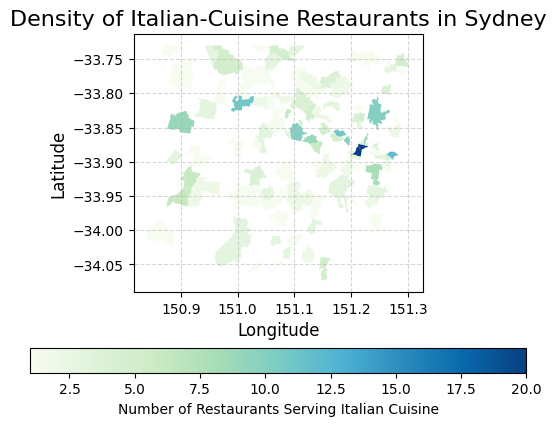

In [28]:
# Calling the function on 'Italian' cuisine
cuisine_density_map(zomato_df, sydney_geojson, 'Italian')

<Figure size 1800x1200 with 0 Axes>

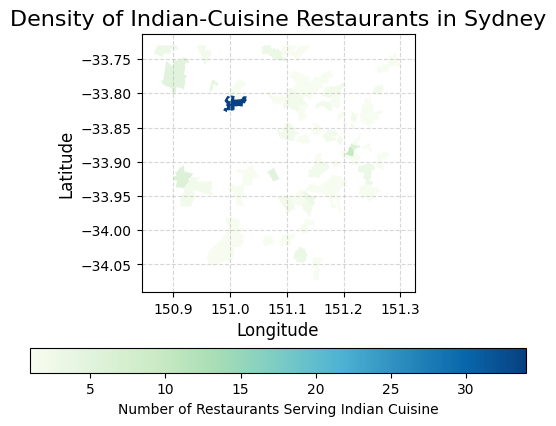

In [29]:
# Calling the function on 'Indian' cuisine
cuisine_density_map(zomato_df, sydney_geojson, 'Indian')

<Figure size 1800x1200 with 0 Axes>

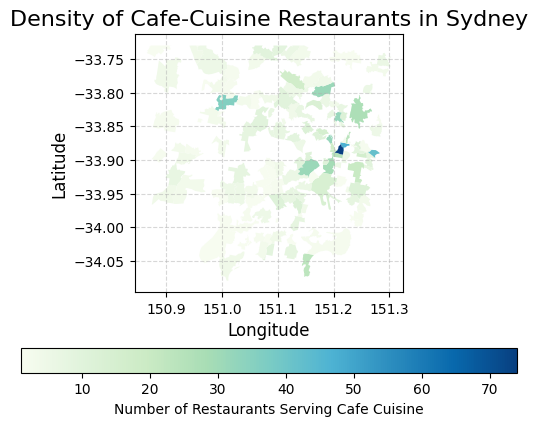

In [30]:
# Calling the function on 'Cafe' cuisine
cuisine_density_map(zomato_df, sydney_geojson, 'Cafe')

<Figure size 1800x1200 with 0 Axes>

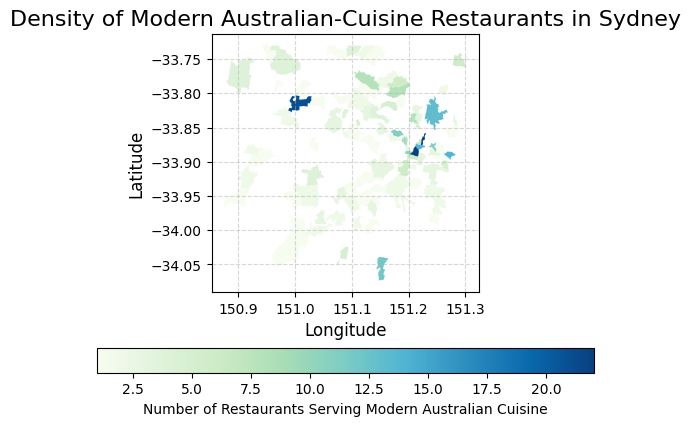

In [31]:
# Calling the function on 'Modern Australian' cuisine
cuisine_density_map(zomato_df, sydney_geojson, 'Modern Australian')

## 4. INTERACTIVE PLOTS USING PLOTLY

In [32]:
# Importing required libraries
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'  

In [33]:
# Creating an interactive bar plot with Plotly of unique cuisines served v/s. restaurant counts

# Converting the dictionary to a DataFrame for easier plotting
cuisine_df = pd.DataFrame(list(cuisine_counts.items()), columns=['Cuisine', 'Count']).sort_values(by='Count', ascending=False)

fig = px.bar(cuisine_df, x='Cuisine', y='Count', title='Unique Cuisines Served by Sydney Restaurants', 
             color_discrete_sequence=px.colors.qualitative.Set2)

# Customizing layout for better interactivity
fig.update_layout(
    xaxis_title="Cuisine",
    yaxis_title="Number of Restaurants Serving the Cuisine",
    xaxis_tickangle=-90,  
    hovermode='x unified',  
    showlegend=False,  
    font=dict(size=12),
    plot_bgcolor='whitesmoke',
    title_x=0.5,  
    title_font=dict(size=18)  
)

fig.show()

In [34]:
# Interactive plot of how restaurants are scattered across the Sydney Map along with average cost and restaurant rating using hover tool

# Filtering the data to include only restaurants in Sydney using the latitude and longitude range
zomato_map_df = zomato_df[
    (zomato_df['lat'] >= -34.0) & (zomato_df['lat'] <= -33.5) &
    (zomato_df['lng'] >= 150.5) & (zomato_df['lng'] <= 151.5)
]

# Creating an interactive scatter plot using Plotly
fig = px.scatter_mapbox(
    zomato_map_df,
    lat='lat',
    lon='lng',
    hover_name='title',
    hover_data={
        'cuisine': True,
        'rating_text': True,
        'cost': True
    },
    color_discrete_sequence=["mediumvioletred"],
    zoom=12,
    height=600
)

# Setting the map center to Sydney's approximate location
fig.update_layout(
    mapbox_style="open-street-map",
    mapbox_center={"lat": -33.8688, "lon": 151.2093},  # Sydney's center coordinates
    title="Interactive Map of Sydney Restaurants",
    margin={"r":0,"t":0,"l":0,"b":0},
    hoverlabel=dict(
        bgcolor="white", 
        font_size=14,  
        font_family="Arial"  
    )
)
fig.show()

### Benefits of using interactive plots (Plotly) over static plots
Non-interactive plots fall short in terms of users’ exploratory abilities and insight levels. 

In the first plot, a static bar chart showing all Sydney restaurants by cuisine would implode: fixed labels would hinder readability as seen in the first plot in the code, and it’s not possible to hover for exact counts, the printed counts look messy and conjusted, on the contrary, the Plotly interactive library helps us explore it dynamically to find out the exact number of restaurants serving that particular cuisine.

In the second plot, a non-interactive map of restaurant locations would be overcrowded, particularly in dense areas like the Sydney CBD. Interactive features, such as zooming and hovering, make it easy to focus on specific locations and view details like cuisine, cost, and rating, thus proving all necessary information in a clean manner.

These interactive features provide a more dynamic and insightful user experience, making the data more accessible and engaging, whereas static plots would lack the flexibility to explore these multiple dimensions effectively.

# PART-B

In [35]:
# Storing data in a dataframe with the first row as column names
zomato_data = pd.read_csv(zomato_data_path, header=0)

In [36]:
# Checking the number of rows
len(zomato_data)

10500

## 1. FEATURE ENGINEERING

### I. HANDLING MISSING VALUES

In [37]:
# Checking for null values
zomato_df_nulls = zomato_data.isnull().sum()
zomato_df_nulls

address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64

In [38]:
# Dropping unnecessary columns
zomato_cleaned = zomato_data.drop(columns=['color', 'cost_2', 'cuisine_color'])

In [39]:
# IMPUTING NUMERICAL COLUMNS

# Filling null values in numerical columns with the column mean
for column in zomato_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    zomato_cleaned[column] = zomato_cleaned[column].fillna(zomato_cleaned[column].mean())  

# Filling null values in categorical columns with the column mode
for column in zomato_cleaned.select_dtypes(include=['object']).columns:
    zomato_cleaned[column] = zomato_cleaned[column].fillna(zomato_cleaned[column].mode()[0]) 

In [40]:
# Checking the number of rows
len(zomato_cleaned)

10500

In [41]:
# Checking for any remaining null values
zomato_cleaned.isnull().sum()

address          0
cost             0
cuisine          0
lat              0
link             0
lng              0
phone            0
rating_number    0
rating_text      0
subzone          0
title            0
type             0
votes            0
groupon          0
dtype: int64

### 2. FEATURE ENCODING

In [42]:
# Importing required libraries
from sklearn.preprocessing import LabelEncoder
import ast

In [43]:
# Changing all boolean value colunms are converted to 0s and 1s
boolean_columns = zomato_cleaned.select_dtypes(include=['bool']).columns
zomato_cleaned[boolean_columns] = zomato_cleaned[boolean_columns].astype(int)
zomato_cleaned = zomato_cleaned.replace({True: 1, False: 0})

In [44]:
# Checking the number of rows
len(zomato_cleaned)

10500

In [45]:
# Label Encoding rating_text column
if 'rating_text' in zomato_cleaned.columns:
    labelencoder = LabelEncoder()
    zomato_cleaned['rating_text_encoded'] = labelencoder.fit_transform(zomato_cleaned['rating_text'])

In [46]:
# Helper function to safely convert strings of lists into actual lists
def safe_eval(val):
    if isinstance(val, str):
        try:
            return ast.literal_eval(val)
        # If conversion fails, return as a single-item list
        except:
            return [val]
    return val

# Flattening cuisine column
if 'cuisine' in zomato_cleaned.columns:
    zomato_cleaned['cuisine'] = zomato_cleaned['cuisine'].apply(safe_eval)
    cuisine_dummies = zomato_cleaned['cuisine'].str.join('|').str.get_dummies()
    cuisine_dummies = cuisine_dummies.add_prefix('cuisine_') 
    zomato_cleaned = pd.concat([zomato_cleaned, cuisine_dummies], axis=1)
    zomato_cleaned.drop(columns=['cuisine'], inplace=True)

# Flattening type column
if 'type' in zomato_cleaned.columns:
    zomato_cleaned['type'] = zomato_cleaned['type'].apply(safe_eval)
    type_dummies = zomato_cleaned['type'].str.join('|').str.get_dummies()
    type_dummies = type_dummies.add_prefix('type_')  
    zomato_cleaned = pd.concat([zomato_cleaned, type_dummies], axis=1)
    zomato_cleaned.drop(columns=['type'], inplace=True)

In [47]:
# Checking the number of rows
len(zomato_cleaned)

10500

In [48]:
# Displaying first 5 rows
zomato_cleaned.head()

address   cost        lat  \
0                      371A Pitt Street, CBD, Sydney   50.0 -33.876059   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0 -33.910999   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0 -33.867971   
3   Sydney Opera House, Bennelong Point, Circular...  270.0 -33.856784   
4              20 Campbell Street, Chinatown, Sydney   55.0 -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  ...  \
0                                    CBD                   Sydney Madang  ...   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe  ...   
2                      The Star, Pyrmont                           Sokyo  ...   
3                          Circular Quay            Bennelong Restaurant  ...   
4                              Chinatown                       Chat Thai  ...   

   type_Casual Dining  type_Club  type_Dessert Parlour  type_Fast Food  \
0                   1          0                     0               0   
1                   0          0                     0               0   
2                   0          0                     0               0   
3                   0          0                     0               0   
4                   1          0                     0               0   

   type_Fine Dining  type_Food Court  type_Food Stall  type_Food Truck  \
0                 0                0                0                0   
1                 0                0                0                0   
2                 1                0                0                0   
3                 1                0                0                0   
4                 0                0                0                0   

   type_Pub  type_Wine Bar  
0         0              0  
1         0              0  
2         0              0  
3         0              0  
4         0              0  

[5 rows x 161 columns]

## II. REGRESSION

In [49]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [50]:
# Dropping non numeric columns
del_columns = ['address', 'url', 'phone', 'cuisine', 'title', 'subzone', 'type','link','rating_text'] 
zomato_linear = zomato_cleaned.drop(columns=del_columns, errors='ignore')

In [51]:
# Defining features (X) as all numeric values except rating and target (y) as rating
X = zomato_linear.drop(columns=['rating_number'])
X = X.select_dtypes(include=['number'])
y = zomato_linear['rating_number']  

In [52]:
# Splitting the dataset: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Linear Regression Model

In [53]:
# Building the linear regression model
model_regression_1 = LinearRegression()

# Training the model
model_regression_1.fit(X_train, y_train)

LinearRegression()

In [54]:
# Predicting using the test set
y_pred = model_regression_1.predict(X_test)

# Evaluating the model using RMSE and R-squared
rmse = rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculating the Mean Squared Error (MSE) for model evaluation
mse = mean_squared_error(y_test, y_pred)


In [55]:
print("Linear Regression Results-")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Linear Regression Results-
Mean Squared Error: 0.0798003277448754
Root Mean Squared Error (RMSE): 0.28248951793805627
R-squared (R²): 0.46003937550879326


In [56]:
# Feature scaling for standardizing the range of independent variables for second model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4. Gradient Descent

In [57]:
# Building the Linear Regression Model using Gradient Descent with additional parameters
model_regression_2 = SGDRegressor(max_iter=100000, tol=1e-5, eta0=0.0001, learning_rate='constant', alpha=0.1)

# Training the model on the training data
model_regression_2.fit(X_train, y_train)

SGDRegressor(alpha=0.1, eta0=0.0001, learning_rate='constant', max_iter=100000,
             tol=1e-05)

In [58]:
# Making predictions on the test data
y_pred_sgd = model_regression_2.predict(X_test)

# Evaluating the model using RMSE and R-squared
rmse_sgd = rmse = root_mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

# Calculating the Mean Squared Error (MSE) for model evaluation
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

In [59]:
print("Gradient Descent Results-")
print(f"Mean Squared Error (SGD): {mse_sgd}")
print(f"Root Mean Squared Error (SGD): {rmse_sgd}")
print(f"R-squared (SGD): {r2_sgd}")

Gradient Descent Results-
Mean Squared Error (SGD): 0.07996890408535155
Root Mean Squared Error (SGD): 0.2827877368015656
R-squared (SGD): 0.4588987212201423


### Conclusions on MSE, RMSE and R-Squared values of both models
MSE (Mean Squared Error): Linear Regression has a slightly lower MSE (0.07980) compared to SGD (0.07996). This means that Linear Regression has a slightly better fit with smaller mean squared errors but the difference is negligible.

RMSE (Root Mean Squared Error): The RMSE values are very close, with Linear Regression at 0.28249 and SGD at 0.28279. Both models perform similarly in terms of prediction error, with Linear Regression having a slightly lower RMSE, indicating a slightly smaller prediction error on average.

R-squared (R²): Linear Regression explains slightly more variance in the data (R² = 0.46004) compared to SGD (R² = 0.45890). While both models explain roughly 46% of the variance, Linear Regression performs marginally better in capturing the variability of the target variable.

Linear Regression slightly outperforms SGD across all metrics (MSE, RMSE, and R²), but the differences are very small and negligible, indicating both models are performing almost equally well.

## III. CLASSIFICATION

In [60]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### 6. SIMPLIFYING RATING INTO BINARY CLASSIFIACTIONS

In [61]:
# Simplifying the 'rating_text' column to two classes
rating_map = {
    'Poor': 1,
    'Average': 1,
    'Good': 2,
    'Very Good': 2,
    'Excellent': 2
}

# Mapping the classification funtion to the cleaned data
zomato_cleaned['binary_rating'] = zomato_cleaned['rating_text'].map(rating_map)

print(zomato_cleaned[['rating_text', 'binary_rating']].head(5))

  rating_text  binary_rating
0   Very Good              2
1   Excellent              2
2   Excellent              2
3   Excellent              2
4   Excellent              2


In [62]:
# Checking the distribution of the binary classification
binary_classification_distribution = zomato_cleaned['binary_rating'].value_counts()

print("\nDistribution of binary classification")
print(binary_classification_distribution)


Distribution of binary classification
binary_rating
1    8026
2    2474
Name: count, dtype: int64


There is a large diffrence in the number of instances between each of the 2 classes with 13688 in Class 1 and Class 2.

### 7. LOGISTIC REGRESSION

In [63]:
# Selecting all one-hot encoded cuisine columns
cuisine_columns = [col for col in zomato_cleaned.columns if col.startswith('cuisine_')]

# Converting cuisine columns to numeric (though they are already numeric due to one-hot encoding)
for cuisine in cuisine_columns:
    zomato_cleaned[cuisine] = pd.to_numeric(zomato_cleaned[cuisine], errors='coerce')

In [64]:
cuisine_columns

['cuisine_Afghani',
 'cuisine_African',
 'cuisine_American',
 'cuisine_Arabian',
 'cuisine_Argentine',
 'cuisine_Asian',
 'cuisine_Australian',
 'cuisine_Austrian',
 'cuisine_BBQ',
 'cuisine_Bakery',
 'cuisine_Bangladeshi',
 'cuisine_Bar Food',
 'cuisine_Belgian',
 'cuisine_Beverages',
 'cuisine_Brasserie',
 'cuisine_Brazilian',
 'cuisine_British',
 'cuisine_Bubble Tea',
 'cuisine_Burger',
 'cuisine_Burmese',
 'cuisine_Cafe',
 'cuisine_Cambodian',
 'cuisine_Cantonese',
 'cuisine_Caribbean',
 'cuisine_Charcoal Chicken',
 'cuisine_Chinese',
 'cuisine_Coffee and Tea',
 'cuisine_Colombian',
 'cuisine_Contemporary',
 'cuisine_Continental',
 'cuisine_Creole',
 'cuisine_Crepes',
 'cuisine_Croatian',
 'cuisine_Cuban',
 'cuisine_Czech',
 'cuisine_Deli',
 'cuisine_Desserts',
 'cuisine_Diner',
 'cuisine_Drinks Only',
 'cuisine_Dumplings',
 'cuisine_Dutch',
 'cuisine_Eastern European',
 'cuisine_Egyptian',
 'cuisine_Ethiopian',
 'cuisine_European',
 'cuisine_Falafel',
 'cuisine_Fast Food',
 'cuisi

In [65]:
# Selecting all one-hot encoded type columns
type_columns = [col for col in zomato_cleaned.columns if col.startswith('type_')]

# Converting cuisine columns to numeric (though they are already numeric due to one-hot encoding)
for type in type_columns:
    zomato_cleaned[type] = pd.to_numeric(zomato_cleaned[type], errors='coerce')

In [66]:
type_columns

['type_Bakery',
 'type_Bar',
 'type_Beverage Shop',
 'type_Café',
 'type_Casual Dining',
 'type_Club',
 'type_Dessert Parlour',
 'type_Fast Food',
 'type_Fine Dining',
 'type_Food Court',
 'type_Food Stall',
 'type_Food Truck',
 'type_Pub',
 'type_Wine Bar']

In [67]:
# Preparing features and target variable for the classification model
X = zomato_cleaned[['cost', 'votes', 'groupon'] + cuisine_columns + type_columns]  # Selecting relevant features
y = zomato_cleaned['binary_rating']  # Binary target variable

In [68]:
# Splitting the data into 80% training and 20% testing after setting random_state to 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
# Scaling the features for the logistic regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Building the logistic regression model
model_classification_3 = LogisticRegression(random_state=0)
model_classification_3.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [71]:
# Making predictions on the test data
y_pred = model_classification_3.predict(X_test_scaled)

### 8. Confusion Matrix and Classification Report

In [72]:
# Evaluating the model using confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [73]:
# Displaying confusion matrix
print("Logistic Regression Performance-")
print("Confusion Matrix:")
print(conf_matrix)

Logistic Regression Performance-
Confusion Matrix:
[[1583   48]
 [ 255  214]]


In [74]:
# Displaying classification report
print("\n Logistic Regression Classification Report:")
print(class_report)


 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.97      0.91      1631
           2       0.82      0.46      0.59       469

    accuracy                           0.86      2100
   macro avg       0.84      0.71      0.75      2100
weighted avg       0.85      0.86      0.84      2100



### 9. CONCLUSIONS AND OBSERVATIONS

The logistic regression model demonstrates strong overall accuracy (86%), but its performance varies significantly between the two classes due to class imbalance.

Class 1 Performance (Poor/Average): With 8026 instances, Class 1 dominates the dataset, and the model handles it well, achieving a high precision (0.86) and recall (0.97). This indicates that the model is excellent at identifying restaurants with poor or average ratings.

Class 2 Performance (Good/Very Good/Excellent): For Class 2 (2474 instances), the model doesn't perform as well, achieving a precision of 0.82 but a recall of only 0.46. Many Class 2 instances are misclassified as Class 1, reflecting the model's difficulty in identifying better-rated restaurants.

The significant imbalance (8026 Class 1 vs. 2474 Class 2) contributes to the model's bias toward Class 1, causing low recall for Class 2.

In summary, while the model performs well for Class 1, its ability to detect Class 2 needs improvement. 

### 10. BUILDING RANDOM FOREST, SUPPORT VECTOR MACHINE (SVM) AND DECISION TREE CLASSIFIERS

In [75]:
# Preparing the features and target variable
X = zomato_cleaned[['cost', 'votes', 'groupon'] + cuisine_columns +  type_columns]  
y = zomato_cleaned['binary_rating']  

In [76]:
# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [77]:
# Scaling the features for consistency across models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
# Building Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)

In [79]:
print("Random Forest Classifier Performance-")
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Classifier Performance-
[[1544   87]
 [ 139  330]]
              precision    recall  f1-score   support

           1       0.92      0.95      0.93      1631
           2       0.79      0.70      0.74       469

    accuracy                           0.89      2100
   macro avg       0.85      0.83      0.84      2100
weighted avg       0.89      0.89      0.89      2100



In [80]:
# Building Support Vector Machine (SVM) Classifier
svm_model = SVC(random_state=0)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

In [81]:
print("\nSVM Classifier Performance-")
print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


SVM Classifier Performance-
[[1609   22]
 [ 331  138]]
              precision    recall  f1-score   support

           1       0.83      0.99      0.90      1631
           2       0.86      0.29      0.44       469

    accuracy                           0.83      2100
   macro avg       0.85      0.64      0.67      2100
weighted avg       0.84      0.83      0.80      2100



In [82]:
# Building K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

In [83]:
print("\nKNN Classifier Performance-")
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


KNN Classifier Performance-
[[1539   92]
 [ 284  185]]
              precision    recall  f1-score   support

           1       0.84      0.94      0.89      1631
           2       0.67      0.39      0.50       469

    accuracy                           0.82      2100
   macro avg       0.76      0.67      0.69      2100
weighted avg       0.80      0.82      0.80      2100



### Conclusions on Classifiers Performance
Random Forest:
The Random Forest classifier outperforms the others, achieving 89% accuracy with strong precision, recall, and F1-scores across both classes. It handles the class imbalance better, with fewer misclassifications in Class 2 (139 compared to higher misclassifications in other models). Its balanced performance makes it the most reliable for classification of text based rating.

Logistic Regression:
This model achieves good overall accuracy of 86% but struggles with classifying Class 2 instances (255 misclassifications), making it less effective than Random Forest. It performs very well for Class-1 classifications but needs to be improved for Class-2.

SVM Classifier:
The SVM model shows decent performance with 83% accuracy, but is inaccurate while identifying instances of Class 2, misclassifying 331 instances. It handled Class 1 well, but it has limitations with the minority class make it less ideal for the binary classification of the ratings.

KNN Classifier:
The KNN model shows the weakest performance, with an accuracy of 82% and lower precision and recall values (0.80 and 0.82). It also has the highest misclassifications, making it less suitable for this task, particularly with such class imbalance.

Random Forest is the best model due to its balanced performance across both classes and fewer misclassifications in Class 2. 
